## TASK 4 - Iris Dataset - Apply Decision Tree Classifier with max depth 5 and visualize the decision tree graphically.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn.datasets import load_iris
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
import seaborn as sb
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

In [5]:
iris = load_iris()

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [26]:
label = iris.target
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
data.shape

(150, 4)

In [10]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Check for missing values

In [13]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [14]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

### Check for categorical attributes in the dataset

In [15]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("categorical attributes")
print(object_cols)

categorical attributes
[]


### Visualize the data distribution using hist() method

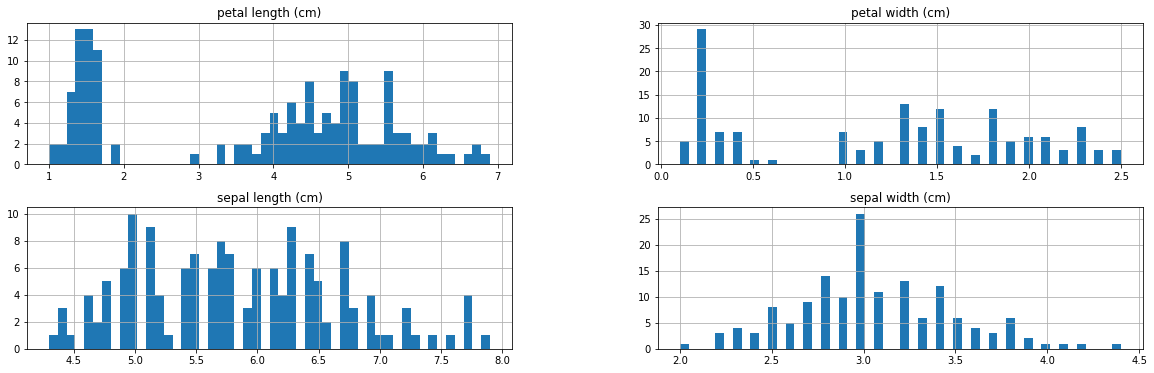

In [16]:
data.hist(bins = 50, figsize = (20,6))
plt.show()

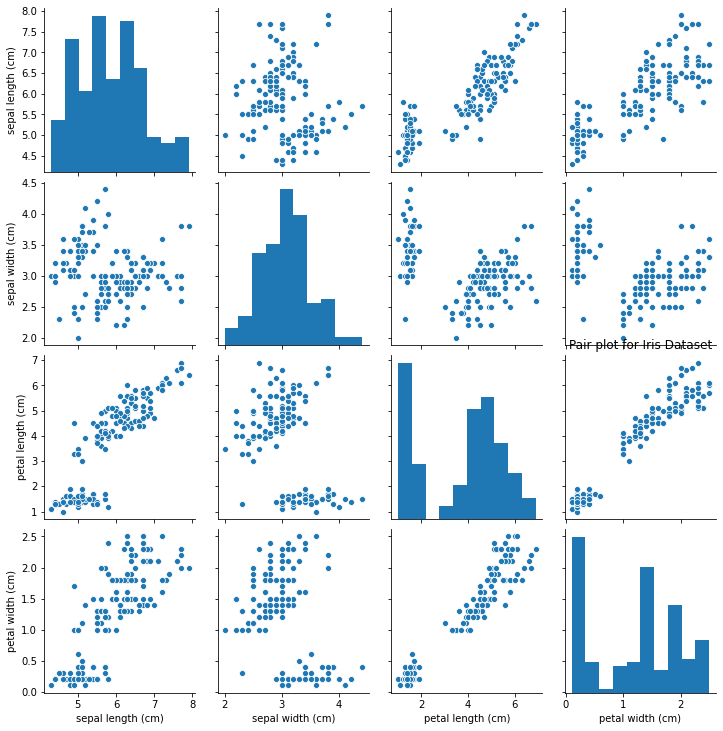

In [17]:
sb.pairplot(data)
plt.title("Pair plot for Iris Dataset", fontsize = 12)
plt.show()

### Train ML Model - Decision Tree Classifier with max depth 5

In [18]:
dec_tree = DecisionTreeClassifier(max_depth=5)
dec_tree.fit(data, label)

DecisionTreeClassifier(max_depth=5)

### Visualize the Decsion Tree graphically

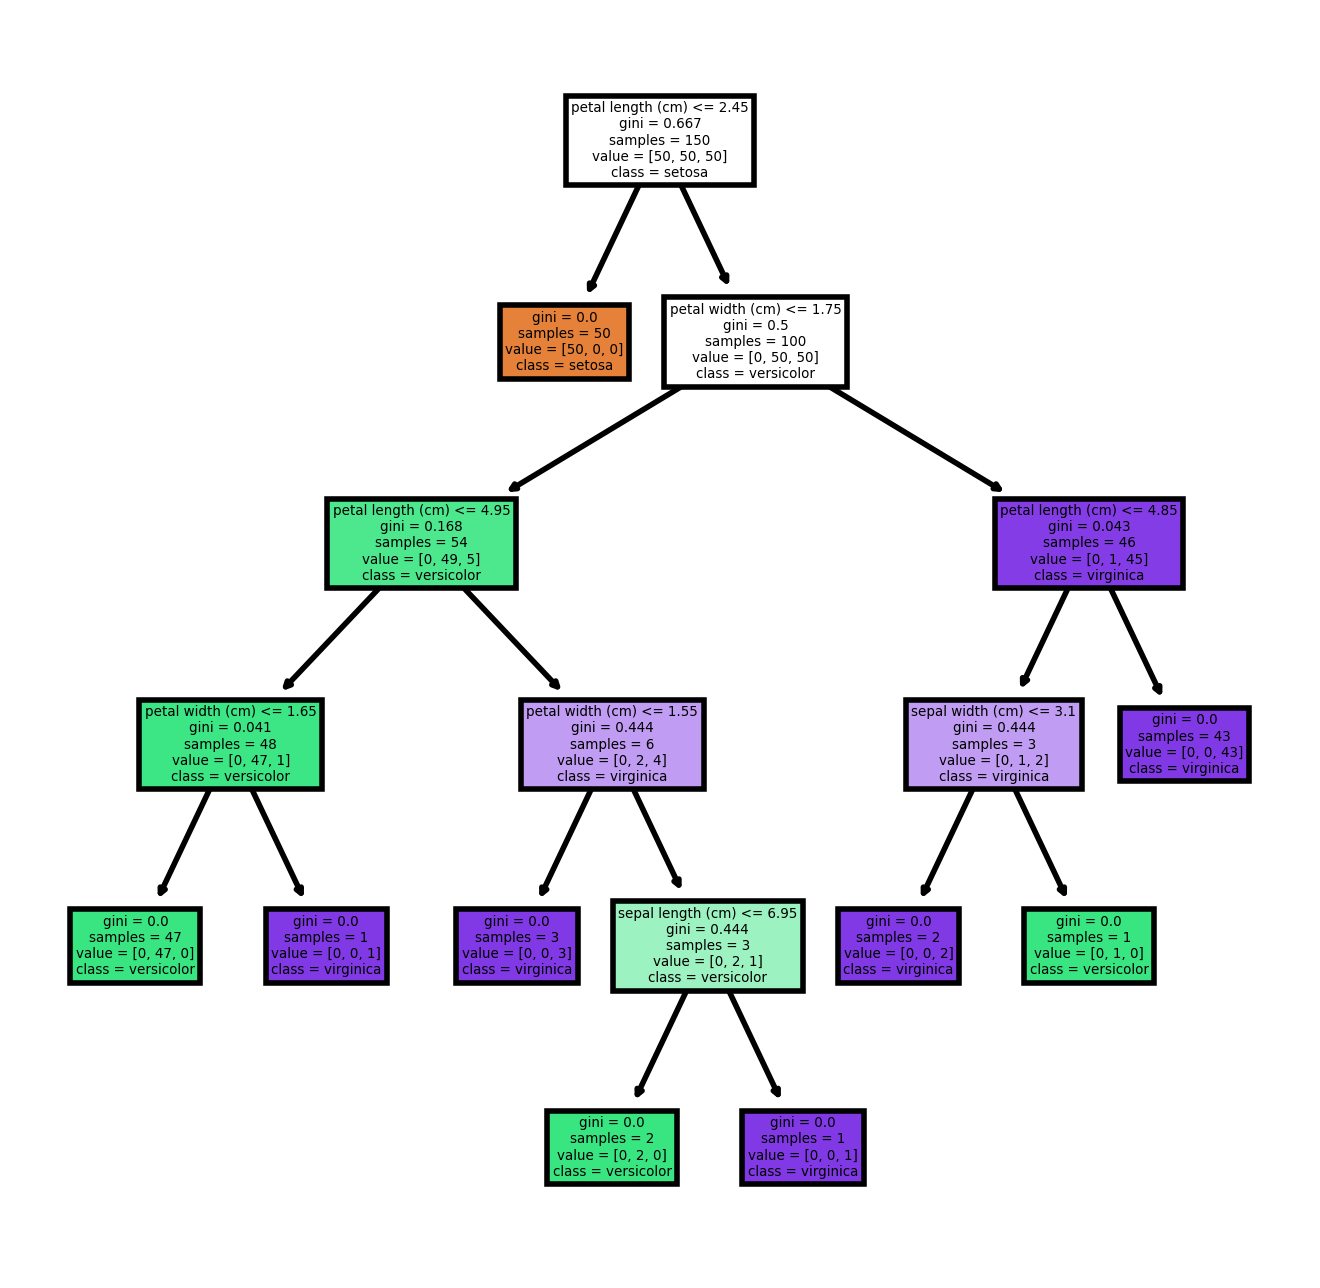

In [19]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=400)

tree.plot_tree(dec_tree, feature_names = fn, class_names=cn, filled = True);


### Predict the correct class for the new data using our trained model

In [23]:
new_data = np.array([[1, 2, 4, 0.2], [  4.7, 3, 1.3, 0.2 ], [5.2,2.1,1.2,0.1]])
print("new_data.shape: {}".format(new_data.shape))

new_data.shape: (3, 4)


In [24]:
predictions = dec_tree.predict(new_data)

In [25]:
print("Prediction of Species: {}".format(predictions))

Prediction of Species: [1 0 0]


Target Class 0 - Iris-Setosa, 
Target Calss 1 - Iris-Versicolor, 
Target Class 2 - Iris-Virginica